## Observations and Insights 

In [1]:
#%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer" )

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].unique()
total_mice = len(mice_number)
print(f"Total mice number is {total_mice}")

Total mice number is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Locate the mouseID which was duplicated and display the first row
data_groups = combined_df.groupby(combined_df.columns.tolist())
size = data_groups.size().reset_index() 
size[size[0] > 1]   


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,0
586,g989,Propriva,Female,21,26,0,45.0,0,2


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_number = cleaned_df["Mouse ID"].unique()
total_mice = len(mice_number)
print(f"Total mice number is now {total_mice}")

Total mice number is now 248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group dataset by Drug Regimen
grouped_df = cleaned_df.groupby(["Drug Regimen"])

#Find out the mean, median, variance, standard deviation, and SEM 
mean = grouped_df["Tumor Volume (mm3)"].mean()
median = grouped_df["Tumor Volume (mm3)"].median()
variance = grouped_df["Tumor Volume (mm3)"].var()
std = grouped_df["Tumor Volume (mm3)"].std()
sem = grouped_df["Tumor Volume (mm3)"].sem()

In [7]:
#Put all the findings in a summary dataframe and display
summary_df = pd.DataFrame({"Mean" : mean,
                          "Median" : median,
                          "Variance" : variance,
                          "Standard Deviation" : std,
                          "SEM" : sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

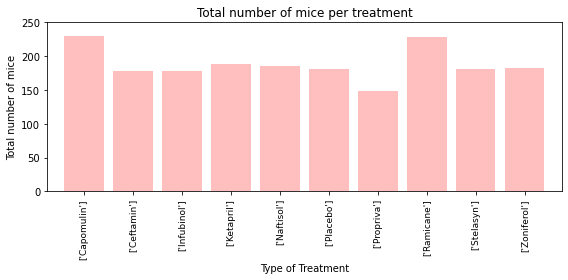

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study

#-------------using pyplot-------------

#define x_axis, in this case we know there is 10 Drug Regemen, so setup x_axis from 1 to 10
x_axis = np.arange(10)

#find the mouse numbers treatment names
mice_count = grouped_df["Mouse ID"].count()
treatment_name = grouped_df["Drug Regimen"].unique()

#set the chart size and plot the bar chart
plt.figure(figsize=(8,4))
plt.bar(x_axis, mice_count, color = "r", alpha = 0.25, align = "center")

#setup the ticks in x_axis
tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, grouped_df["Drug Regimen"].unique(), rotation="vertical" )
plt.tick_params(axis='x', labelsize=9)

#setup x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_count)+20)

#Setup the title and labels
plt.xlabel("Type of Treatment")
plt.ylabel("Total number of mice")
plt.title("Total number of mice per treatment")
plt.tight_layout()
plt.show()


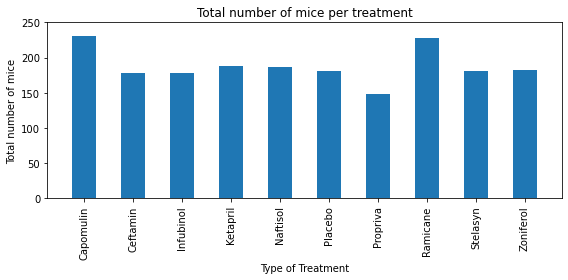

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

#-------------using pandas-------------

#Plot the chart
mice_count.plot(kind="bar", figsize = (8,4))

#setup x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_count)+20)

#label and title the charts
plt.xlabel("Type of Treatment")
plt.ylabel("Total number of mice")
plt.title("Total number of mice per treatment")
plt.tight_layout()
plt.show()


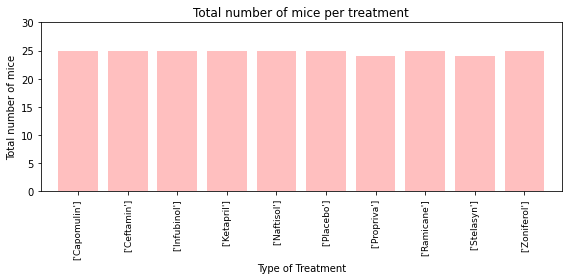

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
# NOTE: ADDTIONAL CHART
# As the homework instruction is not very clear if each mice only to be counted ONCE in each treatment,
# I've created another bar chart and count the mice only once in each treatment

# ----using pyplot-------

new_df = cleaned_df[["Mouse ID", "Drug Regimen"]]
new_df = new_df.drop_duplicates(subset=["Mouse ID", "Drug Regimen"], keep='last')
new_df_grouped = new_df.groupby("Drug Regimen")
mouse_count = new_df_grouped["Mouse ID"].count()

treatment_name = grouped_df["Drug Regimen"].unique()

plt.figure(figsize=(8,4))
plt.bar(x_axis, mouse_count, color = "r", alpha = 0.25, align = "center")

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, grouped_df["Drug Regimen"].unique(), rotation="vertical" )

plt.tick_params(axis='x', labelsize=9)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_count)+5)

plt.xlabel("Type of Treatment")
plt.ylabel("Total number of mice")
plt.title("Total number of mice per treatment")
plt.tight_layout()
plt.show()


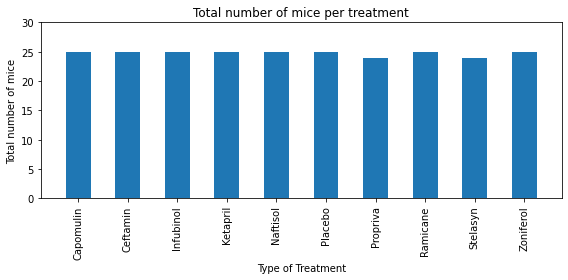

In [11]:
# ----using pandas-------

mouse_count.plot(kind="bar", figsize = (8,4))

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_count)+5)

plt.xlabel("Type of Treatment")
plt.ylabel("Total number of mice")
plt.title("Total number of mice per treatment")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of female versus male')

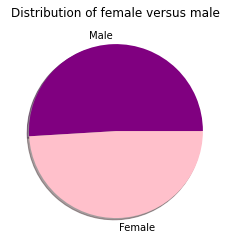

In [12]:
# Generate a pie plot showing the distribution of female versus male mice 
#----using pyplot----

#Setup all the lists and data to be used to plot pie chart
gender=["Male", "Female"]
total_male = cleaned_df.loc[cleaned_df["Sex"]=="Male",:]
total_female = cleaned_df.loc[cleaned_df["Sex"]=="Female",:]
gender_total = [len(total_male), len(total_female)]
colors = ["Purple", "Pink"]

#Plot the pie chart
plt.pie(gender_total, labels = gender, colors = colors, shadow = True, startangle = 0)
plt.title("Distribution of female versus male")


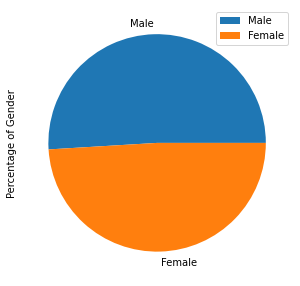

In [13]:
# Generate a pie plot showing the distribution of female versus male mice 
#----using Pandas----- 
per_male = len(total_male) / len(cleaned_df)
per_female = len(total_female) / len(cleaned_df)
per_gender = [per_male, per_female]

df = pd.DataFrame({'Percentage of Gender': per_gender,
                   'Gender': gender},
                  index=["Male", "Female"])
plot = df.plot.pie(y='Percentage of Gender', figsize=(5, 5))

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_treatment_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | 
                                       (cleaned_df["Drug Regimen"] == "Ramicane") |
                                      (cleaned_df["Drug Regimen"] == "Infubinol")|
                                      (cleaned_df["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
selected_grouped = selected_treatment_df.groupby(["Drug Regimen", "Mouse ID"])
last_timepoint = selected_grouped["Timepoint"].idxmax()

      
# Add another collumn in the dataframe, name it Final Tumor Volumn
cleaned_df["Final Tumor Volumn"] = cleaned_df.loc[last_timepoint, 'Tumor Volume (mm3)']


cleaned_df.head(50)


C:\Users\jingd\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volumn
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN
5,k403,Ramicane,Male,21,16,25,33.464577,1,NaN
6,k403,Ramicane,Male,21,16,30,31.099498,1,NaN
7,k403,Ramicane,Male,21,16,35,26.546993,1,NaN
8,k403,Ramicane,Male,21,16,40,24.365505,1,NaN
9,k403,Ramicane,Male,21,16,45,22.050126,1,22.050126


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

 
-----Identify outliers for treatment Capomulin -----------
The lower quartile of tumor volumn is: 32.37735684
The upper quartile of tumor volumn is: 40.1592203
The interquartile range IQR of tumor volumn is: 7.781863460000004
The the median of tumor volumn is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
-----Identify outliers for treatment Ramicane -----------
The lower quartile of tumor volumn is: 31.56046955
The upper quartile of tumor volumn is: 40.65900627
The interquartile range IQR of tumor volumn is: 9.098536719999998
The the median of tumor volumn is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
-----Identify outliers for treatment Infubinol -----------
The lower quartile of tumor volumn is: 54.04860769
The upper quartile of tumor volumn is: 65.52574285
The interquartile range IQR of tumor volumn is: 11.477135160000003
The the median of tumo

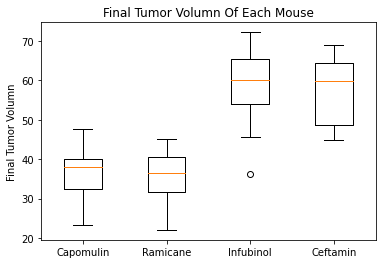

In [16]:
#Loop throught the treatment list to create outcomes

tumor_volume_list=[]
for x in treatment_list:
    
    single_treatment_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == str(x)] 
    single_df_grouped = single_treatment_df.groupby("Mouse ID")
    tumor_volumn1 = single_df_grouped["Tumor Volume (mm3)"].last()
    
    #Add the information to a list and save it for furture ploting
    tumor_volume_list.append(tumor_volumn1)

    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = np.percentile(tumor_volumn1,[25, 50, 75], interpolation='midpoint')
    lowerq = quartiles[0]
    median = quartiles[1]
    upperq = quartiles[2]
    iqr = upperq - lowerq

    print(" ")
    print("-----Identify outliers for treatment " + str(x) +" -----------")
    print(f"The lower quartile of tumor volumn is: {lowerq}")
    print(f"The upper quartile of tumor volumn is: {upperq}")
    print(f"The interquartile range IQR of tumor volumn is: {iqr}")
    print(f"The the median of tumor volumn is: {median} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("=============================================================================")

    
    #Reset all the lists and variables to make sure start fresh again for the next treawtment
    tumor_volumn=[]
    quartiles=[]
    lowerq = 0
    median = 0
    upperq = 0
    iqr = 0
    lower_bound = 0
    upper_bound = 0

#Plot the 4 boxchart together
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumn Of Each Mouse')
ax1.set_ylabel('Final Tumor Volumn')
ax1.boxplot(tumor_volume_list)
tick_locations=[x for x in range(1,5)]
plt.xticks(tick_locations, treatment_list)
plt.show()

## Line and Scatter Plots

(-0.75, 50.0)

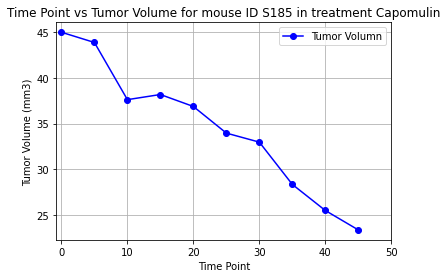

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse
single_mouse_df = cleaned_df.loc[(cleaned_df["Mouse ID"]== "s185") &
                        (cleaned_df["Drug Regimen"]=="Capomulin")]

timepoint = single_mouse_df["Timepoint"]
tumorvolumn = single_mouse_df["Tumor Volume (mm3)"]

plt.plot( timepoint, tumorvolumn, marker = "o", color = "blue", label="Tumor Volumn")
plt.legend(loc = "best")
plt.title("Time Point vs Tumor Volume for mouse ID S185 in treatment Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.xlim(-0.75,50)


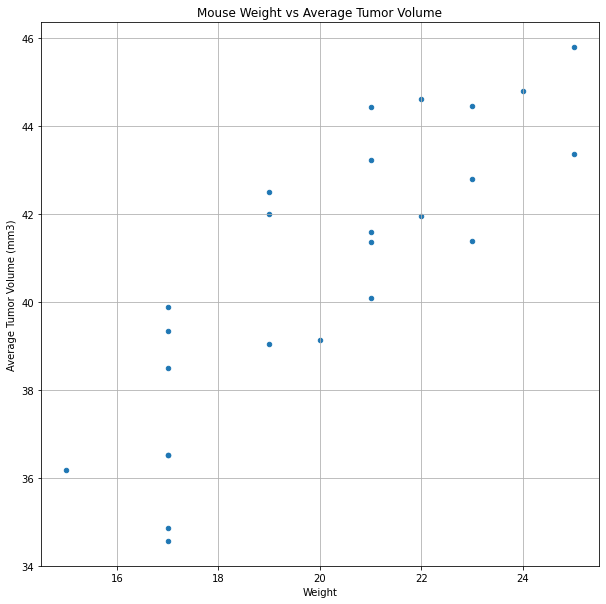

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capomulin_df_grouped = capomulin_df.groupby(["Mouse ID"])


weight = capomulin_df_grouped["Weight (g)"].first()
average = capomulin_df_grouped["Tumor Volume (mm3)"].mean()

combined_df=pd.DataFrame({"Weight":weight,
                         "Average Tumor Volume (mm3)": average})

combined_df.plot(kind="scatter", x="Weight", y="Average Tumor Volume (mm3)", grid = True, figsize=(10,10),
                title="Mouse Weight vs Average Tumor Volume")
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and  
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between average tumor volume and mouse weight is {round(st.pearsonr(average,weight)[0],2)}")

The correlation coefficient between average tumor volume and mouse weight is 0.84


The r-squared is: 0.7088568047708719


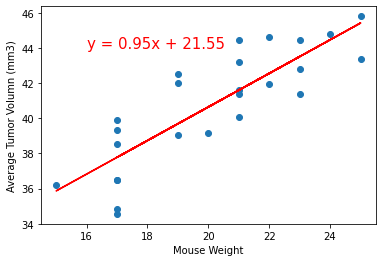

In [20]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, average)
plt.plot(weight, regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volumn (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [21]:
#------End of the code--------